In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
spotify = pd.read_csv('./spotify.csv', encoding="latin-1")

In [3]:
spotify.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
spotify.drop('Unnamed: 0', axis = 1, inplace = True)
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

In [5]:
spotify.rename(columns = {'pop': 'popularity', 'bpm':'beats_per_min', 'nrgy':'energy', \
                                  'live': 'liveliness', 'dnce': 'danceability', 'dB': 'loundness', 'val': 'valence ', \
                                   'dur': 'duration', 'acous': 'acousticness', 'spch':'speechiness'}, inplace = True)
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}) in this case no need of 'inplace = true'

In [7]:
spotify.head()

,title,artist,top genre,year,beats_per_min,energy,danceability,loundness,liveliness,valence,duration,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


|__Feature__|__Description__|
|:---|:---|
|`title`|__The title of the songs__|
|`top genre`|__The genre of the songs__|
|`artist`|__The Artist of the songs__|
|`year`|__Song's year in the Billboard__|
|`beats_per_min`|__Beats.Per.Minute - The tempo of the song.__|
|`energy`|__The energy of a song - the higher the value, the more energtic. song__|
|`danceabilityr`|__The higher the value, the easier it is to dance to this song__|
|`loudness`|__The higher the value, the louder the song__|
|`liveness`|__The higher the value, the more likely the song is a live recording__|
|`valence`|__The higher the value, the more positive mood for the song__|
|`duration`|__The length of the song__|
|`acousticness`|__The higher the value the more acoustic the song is__|
|`speechiness`|__The higher the value the more spoken word the song contains__|
|`popularity`|__The higher the value the more popular the song is__|


In [38]:
print('Total number of years in our datset:', len(spotify.year.unique()))
print('We have top song lists from years:', list(spotify.year.unique()))

Total number of years in our datset: 10
We have top song lists from years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [20]:
print('Average popularity by year (in descending order by popularity)')
print('--'*31)
spotify.groupby('year')[['popularity']].mean().sort_values(by = 'popularity', ascending = False)

Average popularity by year (in descending order by popularity)
--------------------------------------------------------------


,popularity
year,
2019,84.354839
2018,72.437500
2017,69.015385
2012,67.771429
2015,64.568421
2010,64.254902
2016,64.162500
2013,63.985915
2014,62.706897


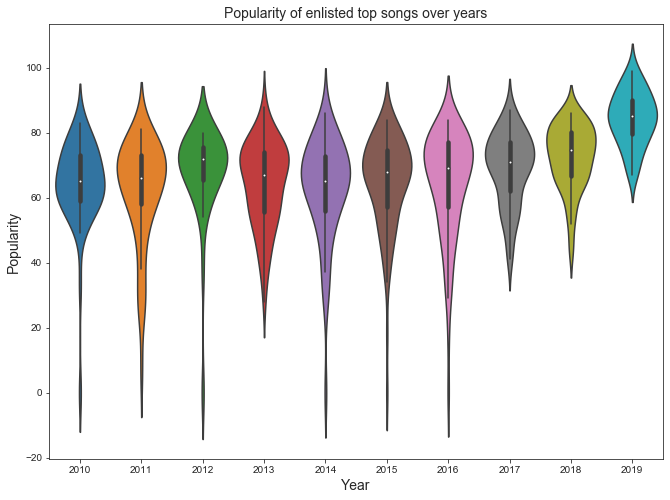

In [255]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='popularity', scale="width")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);

In [46]:
print('Total number of artists who made on the top song list of Spotify in the period 2010-2109:', \
      spotify['artist'].nunique())

Total number of artists who made on the top song list of Spotify in the period 2010-2109: 184


In [45]:
spotify['artist'].value_counts()[:13]

most frequently showed up on the top list


Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Ed Sheeran          11
Pitbull             11
The Chainsmokers    11
Shawn Mendes        11
Calvin Harris       10
Jennifer Lopez      10
Adele               10
Name: artist, dtype: int64

**Katy Perry** has most number of top songs on Spotify in the period of 2010-19 followed by **Justin Bieber**

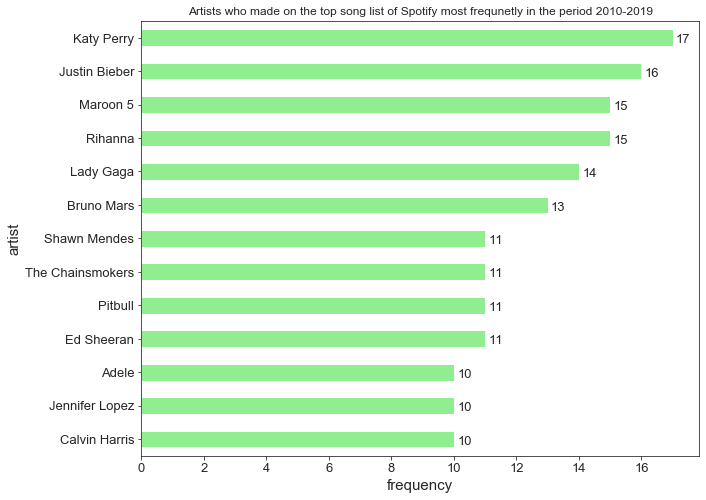

In [276]:
ax = spotify['artist'].value_counts()[:13].sort_values(ascending = True).plot(kind = 'barh', fontsize = 13, \
                                                                             figsize = (10,8), color = 'lightgreen')

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.10, p.get_y()+.09, \
        int(p.get_width()), fontsize=13)
    
plt.xlabel('frequency', fontsize = 15)
plt.ylabel('artist', fontsize = 15)
plt.title('Artists who made on the top song list of Spotify most frequnetly in the period 2010-2019')
plt.show()

In [111]:
katy_perry_data = spotify[spotify['artist'] == 'Katy Perry']
justin_beiber_data = spotify[spotify['artist'] == 'Justin Bieber']

In [115]:
print('The songs of Kety perry made on the top song list on Spotify during 2010-2019')
print('--'*40)
list(katy_perry_data['title'])

The songs of Kety perry made on the top song list on Spotify during 2010-2019
--------------------------------------------------------------------------------


['Teenage Dream',
 'California Gurls',
 'E.T.',
 'Last Friday Night (T.G.I.F.)',
 'Firework',
 'Part Of Me',
 'Wide Awake',
 'The One That Got Away',
 'Roar',
 'Dark Horse',
 'This Is How We Do',
 'Birthday',
 'Legendary Lovers',
 'Rise',
 'Swish Swish',
 'Chained To The Rhythm',
 'Bon appétit']

In [116]:
print('The songs of Justin Bieber made on the top song list on Spotify during 2010-2019')
print('--'*40)
list(justin_beiber_data['title'])

The songs of Justin Bieber made on the top song list on Spotify during 2010-2019
--------------------------------------------------------------------------------


['Baby',
 'Beauty And A Beat',
 'Boyfriend',
 'Heartbreaker',
 'Love Yourself',
 'Sorry',
 'What Do You Mean?',
 'Company',
 "I'll Show You",
 'The Feeling',
 'What Do You Mean? - Acoustic',
 'Mark My Words',
 'Been You',
 'Love Yourself',
 'Company',
 'Friends (with BloodPop®)']

In [132]:
spotify[['artist','title','popularity']].sort_values(by='popularity', ascending = False)[:10]

,artist,title,popularity
572,Maroon 5,Memories,99
573,Selena Gomez,Lose You To Love Me,97
574,Lewis Capaldi,Someone You Loved,96
575,Shawn Mendes,Señorita,95
576,Sam Smith,How Do You Sleep?,93
578,SHAED,Trampoline (with ZAYN),92
577,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...,92
580,Lizzo,Truth Hurts,90
581,Lizzo,Good as Hell (feat. Ariana Grande) - Remix,90
579,Marshmello,Happier,90


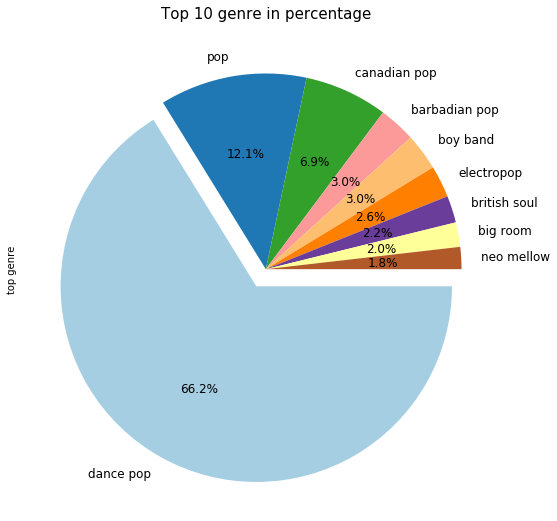

In [211]:
explode = (0.1, 0, 0, 0,0,0,0,0,0)
spotify['top genre'].value_counts()[:9].plot.pie(figsize=(9,9),fontsize = 12, explode=explode, autopct='%1.1f%%', \
                                                       counterclock = False, \
                                                       cmap = plt.get_cmap("Paired"))
plt.title('Top 10 genre in percentage', fontsize = 15);

In [331]:
escape_room_data = spotify[spotify['top genre'] == 'dance pop']

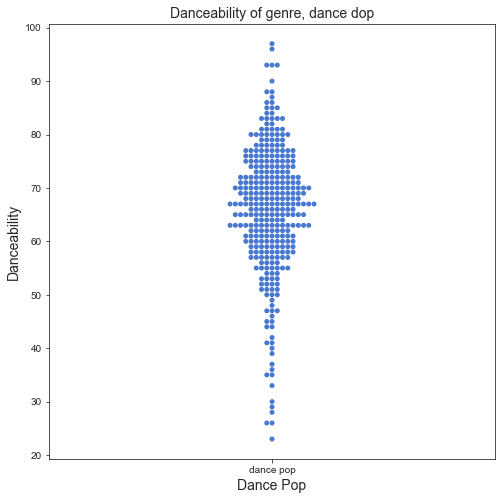

In [361]:
#seaborn swarmplot
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.swarmplot(data=escape_room_data, x='top genre', y='danceability', palette="muted")
ax.set_title('Danceability of genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Danceability', fontsize = 14);

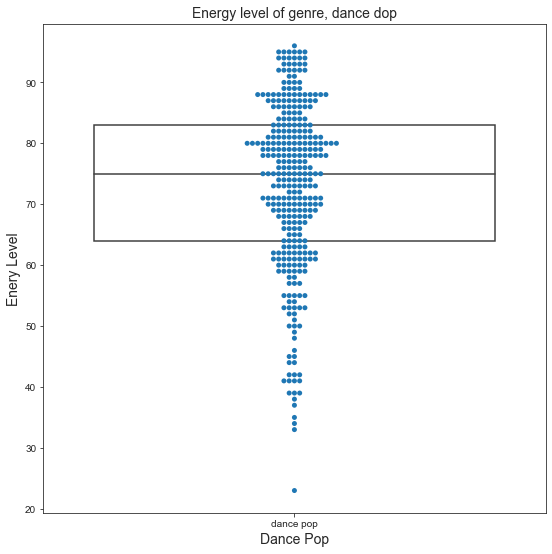

In [359]:
#seaborn swarmplot and boxplot together

fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
ax = sns.swarmplot(data=escape_room_data, x='top genre', y='energy')

# code adopted and modified from https://stackoverflow.com/questions/36153410/how-to-create-swarm-plot-with-matplotlib
ax = sns.boxplot(data=escape_room_data, x='top genre', y='energy',
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})
ax.set_title('Energy level of genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Enery Level', fontsize = 14);

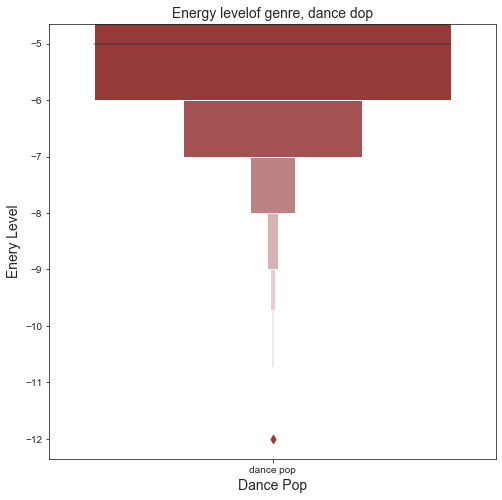

In [358]:
#seaborn boxenplot

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.boxenplot(data=escape_room_data, x='top genre', y='loundness', color = 'brown')
ax.set_title('Energy levelof genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Enery Level', fontsize = 14);

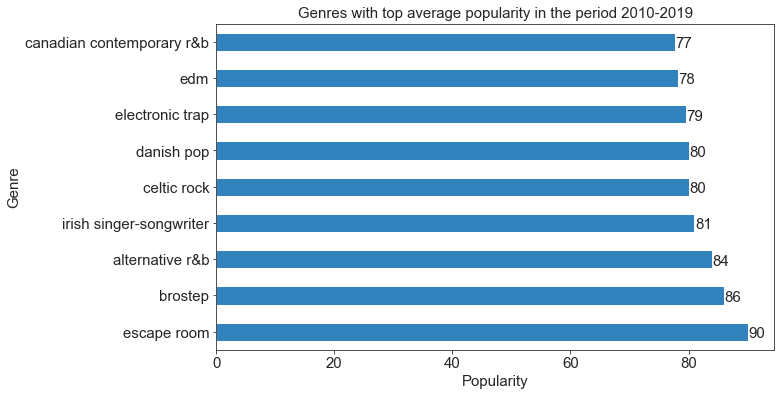

In [294]:
ax = spotify.groupby('top genre').mean()['popularity'].sort_values(ascending = False)[:9].plot(kind = 'barh', \
                                                                             fontsize = 15, \
                                                                             figsize = (10,6), \
                                                                            cmap = plt.get_cmap("tab20c"))

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.10, p.get_y()+.09, \
        int(p.get_width()), fontsize=15)
    
plt.xlabel('Popularity', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.title('Genres with top average popularity in the period 2010-2019', fontsize = 15)
plt.show()

In [295]:
escape_room_data = spotify[spotify['top genre'] == 'escape room']

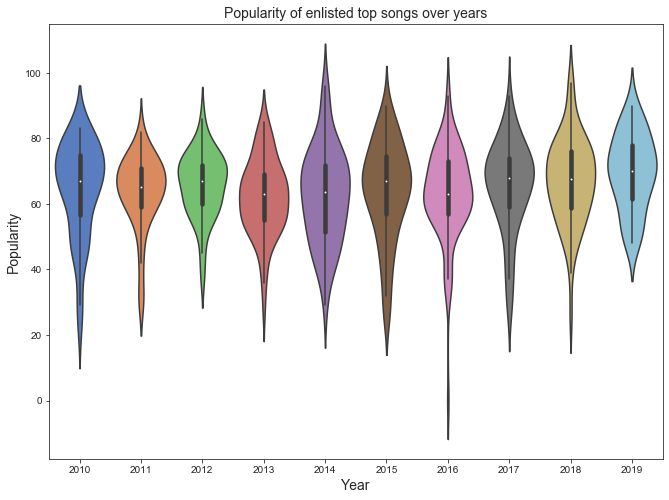

In [281]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='danceability', scale="width", palette="muted")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);

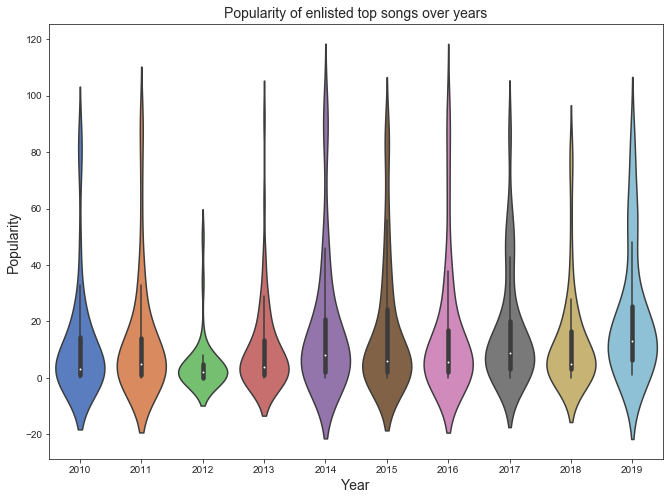

In [278]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='acousticness', scale="width", palette="muted")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);

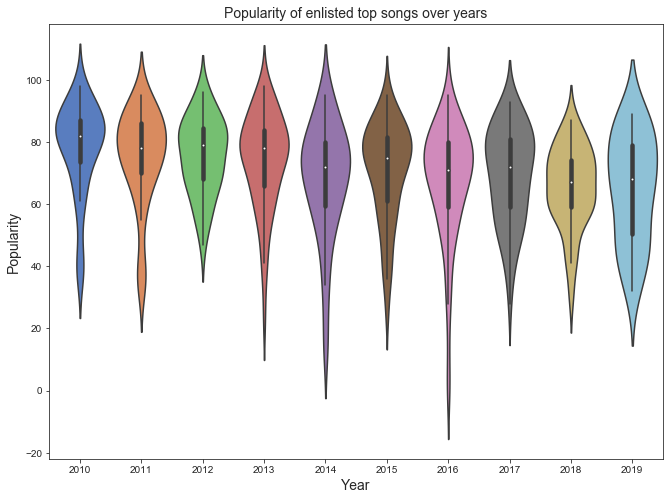

In [279]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='energy', scale="width", palette="muted")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);

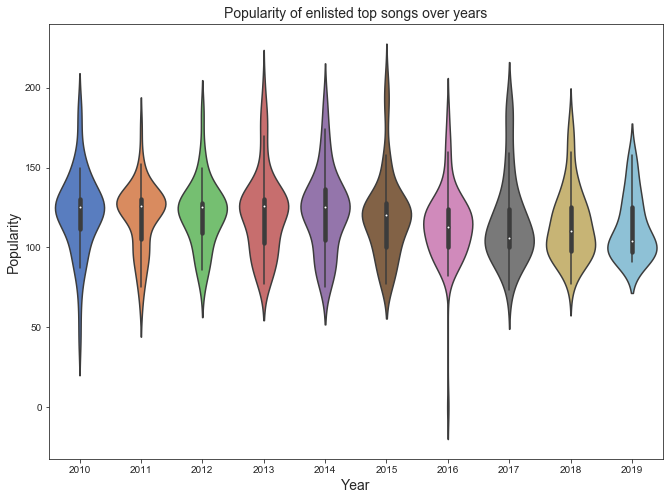

In [280]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='beats_per_min', scale="width", palette="muted")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);